In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pingouin as pg
import plotly.graph_objects as go
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn import preprocessing
from xgboost import XGBClassifier
from xgboost import XGBRegressor

d:\Analitica\Manganeso\manganeso\lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
datos = pd.read_excel('CalidadAgua_LaFE_Ayura.xlsx',sheet_name='MP5')
datos.head(10)

,FECHA,AÑO,MES,DIA,HORA,COMPUERTA,MANGANESO_PREDICCION,MANGANESO,MANGANESO_ANTERIOR,CAUDAL PUENTE ANGOSTURA,...,FECHA2,ALGAS,CIANOBACTERIAS,PH_EMBALSE,TEMPERATURA_EMBALSE,OD_EMBALSE,ODS_EMBALSE,TURBIEDAD,CLOROFILA,FICOCIANINA
0,2020/1/1 4,2020,1,1,4,1,0.030,0.027,0.0027,3.044750,...,2020/1/1,400.0,333.0,7.19,23.03,5.56,64.76,NaN,NaN,NaN
1,2020/1/1 10,2020,1,1,10,1,0.024,0.030,0.0270,2.701733,...,2020/1/1,400.0,333.0,7.52,22.13,5.61,64.21,0.6,4.15,0.96
2,2020/1/1 16,2020,1,1,16,1,0.033,0.024,0.0300,2.484433,...,2020/1/1,400.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/1/1 22,2020,1,1,22,1,0.015,0.033,0.0240,4.070085,...,2020/1/1,400.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/1/2 4,2020,1,2,4,1,0.025,0.015,0.0330,2.824050,...,2020/1/2,333.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020/1/2 10,2020,1,2,10,1,0.023,0.025,0.0150,2.597867,...,2020/1/2,333.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020/1/2 16,2020,1,2,16,1,0.024,0.023,0.0250,2.331367,...,2020/1/2,333.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020/1/2 22,2020,1,2,22,1,0.031,0.024,0.0230,2.496050,...,2020/1/2,333.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020/1/3 4,2020,1,3,4,1,0.028,0.031,0.0240,2.414733,...,2020/1/3,333.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020/1/3 10,2020,1,3,10,1,0.027,0.028,0.0310,2.303350,...,2020/1/3,333.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
datos.shape

(3603, 29)

In [4]:
datos.columns

Index(['FECHA', 'AÑO', 'MES', 'DIA', 'HORA', 'COMPUERTA',
       'MANGANESO_PREDICCION', 'MANGANESO', 'MANGANESO_ANTERIOR',
       'CAUDAL PUENTE ANGOSTURA', 'CAUDAL PALMAS_ESPIRITU', 'NIVEL', 'SOLIDOS',
       'CAUDALB45', 'CAUDALB123', 'PLUVIOMETRIA_DIA', 'TURBIEDAD_PLANTA',
       'COLOR_PLANTA', 'PH_PLANTA', 'FECHA2', 'ALGAS', 'CIANOBACTERIAS',
       'PH_EMBALSE', 'TEMPERATURA_EMBALSE', 'OD_EMBALSE', 'ODS_EMBALSE',
       'TURBIEDAD', 'CLOROFILA', 'FICOCIANINA'],
      dtype='object')

In [5]:
datos.rename(columns={'MANGANESO_PREDICCION':'Manganeso prediccion','MANGANESO':'Manganeso actual','MANGANESO_ANTERIOR':'Manganeso previo','CAUDAL PUENTE ANGOSTURA':'Caudal puente angostura',
'CAUDAL PALMAS_ESPIRITU':'Caudal palmas espiritu','SOLIDOS':'Solidos suspendidos','CAUDALB45':'Caudal bombeo 4-5','PLUVIOMETRIA_DIA':'Pluviometria',
'CAUDALB123':'Caudal bombeo 1-2-3','TURBIEDAD_PLANTA':'Turbiedad entrada planta','COLOR_PLANTA':'Color entrada planta',
'PH_PLANTA':'pH entrada planta','ALGAS':'Algas entrada planta','CIANOBACTERIAS':'Cianobacterias entrada planta','PH_EMBALSE':'pH embalse','TEMPERATURA_EMBALSE':'Temperatura embalse',
'OD_EMBALSE':'Oxigeno disuelto embalse','ODS_EMBALSE':'Oxigeno disuelto saturado embalse','TURBIEDAD':'Turbiedad embalse','CLOROFILA':'Clorofila','FICOCIANINA':'Ficocianina',
'MES':'Mes','HORA':'Hora','COMPUERTA':'Compuerta','NIVEL':'Nivel embalse'},
inplace=True)

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FECHA                              3603 non-null   object 
 1   AÑO                                3603 non-null   int64  
 2   Mes                                3603 non-null   int64  
 3   DIA                                3603 non-null   int64  
 4   Hora                               3603 non-null   int64  
 5   Compuerta                          3603 non-null   int64  
 6   Manganeso prediccion               3388 non-null   float64
 7   Manganeso actual                   3140 non-null   float64
 8   Manganeso previo                   3298 non-null   float64
 9   Caudal puente angostura            3427 non-null   float64
 10  Caudal palmas espiritu             2696 non-null   float64
 11  Nivel embalse                      3599 non-null   float

In [7]:
datos.isnull().sum()

FECHA                                   0
AÑO                                     0
Mes                                     0
DIA                                     0
Hora                                    0
Compuerta                               0
Manganeso prediccion                  215
Manganeso actual                      463
Manganeso previo                      305
Caudal puente angostura               176
Caudal palmas espiritu                907
Nivel embalse                           4
Solidos suspendidos                   414
Caudal bombeo 4-5                      10
Caudal bombeo 1-2-3                     6
Pluviometria                         1137
Turbiedad entrada planta                0
Color entrada planta                    0
pH entrada planta                       0
FECHA2                                  0
Algas entrada planta                   24
Cianobacterias entrada planta          24
pH embalse                           2511
Temperatura embalse               

In [8]:
datos['Caudal puente angostura'].describe()

count    3427.000000
mean        3.260381
std         2.704391
min         0.032667
25%         1.794500
50%         2.806967
75%         3.969248
max        53.021329
Name: Caudal puente angostura, dtype: float64

In [9]:
datos['Caudal puente angostura'].quantile(0.98)

10.183763713836688

In [10]:
datos['Caudal puente angostura'][datos['Caudal puente angostura']>10.18] = datos['Caudal puente angostura'].quantile(0.98)

C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\3408443974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Caudal puente angostura'][datos['Caudal puente angostura']>10.18] = datos['Caudal puente angostura'].quantile(0.98)


In [11]:
datos['Caudal puente angostura'] = datos['Caudal puente angostura'].interpolate(method='linear')

In [12]:
datos['Caudal palmas espiritu'].describe()

count    2696.000000
mean        1.676005
std         1.828018
min         0.074583
25%         0.702247
50%         1.522730
75%         2.081207
max        43.574331
Name: Caudal palmas espiritu, dtype: float64

In [13]:
datos['Caudal palmas espiritu'].quantile(0.98)

5.490680389602973

In [14]:
datos['Caudal palmas espiritu'][datos['Caudal palmas espiritu']>5.49] = datos['Caudal palmas espiritu'].quantile(0.98)

C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\3807728058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Caudal palmas espiritu'][datos['Caudal palmas espiritu']>5.49] = datos['Caudal palmas espiritu'].quantile(0.98)


In [15]:
datos['Caudal palmas espiritu'] = datos['Caudal palmas espiritu'].interpolate(method='linear')

In [16]:
datos['Nivel embalse'].describe()

count    3599.000000
mean     2154.726655
std         8.399030
min      1761.329239
25%      2154.880351
50%      2155.373250
75%      2155.588664
max      2155.985148
Name: Nivel embalse, dtype: float64

In [17]:
datos['Nivel embalse'].fillna(method='ffill',inplace=True)

In [18]:
datos['Solidos suspendidos'].describe()

count    3189.000000
mean      168.632106
std       349.581792
min         0.104167
25%        14.401042
50%        38.828125
75%        99.062497
max      3071.249512
Name: Solidos suspendidos, dtype: float64

In [19]:
datos['Solidos suspendidos'].quantile(0.98)

1023.74987792969

In [20]:
datos['Solidos suspendidos'][datos['Solidos suspendidos']>1023.74] = datos['Solidos suspendidos'].quantile(0.98)

C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\3090792834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Solidos suspendidos'][datos['Solidos suspendidos']>1023.74] = datos['Solidos suspendidos'].quantile(0.98)


In [21]:
datos['Solidos suspendidos'] = datos['Solidos suspendidos'].interpolate(method='linear')

In [22]:
datos['Caudal bombeo 4-5'].describe()

count    3593.000000
mean      888.006047
std       904.043896
min         0.000000
25%         0.000000
50%      1217.794210
75%      1436.994720
max      2774.212748
Name: Caudal bombeo 4-5, dtype: float64

In [23]:
datos['Caudal bombeo 4-5'] = datos['Caudal bombeo 4-5'].interpolate(method='linear')

In [24]:
datos['Caudal bombeo 1-2-3'].describe()

count    3597.000000
mean      909.134918
std       974.555890
min         0.000000
25%         0.000000
50%      1092.639530
75%      1537.882121
max      4002.650798
Name: Caudal bombeo 1-2-3, dtype: float64

In [25]:
datos['Caudal bombeo 1-2-3'].quantile(0.98)

2834.110668945315

In [26]:
datos['Caudal bombeo 1-2-3'][datos['Caudal bombeo 1-2-3']>2834.11] = datos['Caudal bombeo 1-2-3'].quantile(0.98)

C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\2297242048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Caudal bombeo 1-2-3'][datos['Caudal bombeo 1-2-3']>2834.11] = datos['Caudal bombeo 1-2-3'].quantile(0.98)


In [27]:
datos['Caudal bombeo 1-2-3'] = datos['Caudal bombeo 1-2-3'].interpolate(method='linear')

In [28]:
datos['Turbiedad entrada planta'].describe()

count    3603.000000
mean       14.248651
std        19.625104
min         0.000000
25%         5.805000
50%         8.500000
75%        15.400000
max       430.000000
Name: Turbiedad entrada planta, dtype: float64

In [29]:
datos['Turbiedad entrada planta'].quantile(0.98)

64.97600000000003

In [30]:
datos['Turbiedad entrada planta'][datos['Turbiedad entrada planta']>64.97] = datos['Turbiedad entrada planta'].quantile(0.98)

C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\2705059925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Turbiedad entrada planta'][datos['Turbiedad entrada planta']>64.97] = datos['Turbiedad entrada planta'].quantile(0.98)


In [31]:
datos['Turbiedad entrada planta'] = datos['Turbiedad entrada planta'].interpolate(method='linear')

In [32]:
datos['Color entrada planta'].describe()

count    3603.000000
mean      143.331418
std       173.138750
min         0.000000
25%        65.000000
50%        88.000000
75%       151.000000
max      4100.000000
Name: Color entrada planta, dtype: float64

In [33]:
datos['Color entrada planta'].quantile(0.98)

655.96

In [34]:
datos['Color entrada planta'].quantile(0.02)

39.0

In [35]:
datos['Color entrada planta'][datos['Color entrada planta']>655.96] = datos['Color entrada planta'].quantile(0.98)
datos['Color entrada planta'][datos['Color entrada planta']<39] = datos['Color entrada planta'].quantile(0.02)

C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\3510700220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Color entrada planta'][datos['Color entrada planta']>655.96] = datos['Color entrada planta'].quantile(0.98)
C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\3510700220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Color entrada planta'][datos['Color entrada planta']<39] = datos['Color entrada planta'].quantile(0.02)


In [36]:
datos['Color entrada planta'] = datos['Color entrada planta'].interpolate(method='linear')

In [37]:
datos['pH entrada planta'].describe()

count    3603.000000
mean        6.799031
std         0.518745
min         0.000000
25%         6.745000
50%         6.820000
75%         6.940000
max         7.500000
Name: pH entrada planta, dtype: float64

In [38]:
datos['Algas entrada planta'].describe()

count    3579.000000
mean      435.883766
std       583.333845
min         0.000000
25%         5.000000
50%       133.000000
75%       733.000000
max      4529.000000
Name: Algas entrada planta, dtype: float64

In [39]:
datos['Algas entrada planta'].quantile(0.98)

1933.0

In [40]:
datos['Algas entrada planta'][datos['Algas entrada planta']>1933] = datos['Algas entrada planta'].quantile(0.98)

C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\1196851761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Algas entrada planta'][datos['Algas entrada planta']>1933] = datos['Algas entrada planta'].quantile(0.98)


In [41]:
datos['Algas entrada planta'] = datos['Algas entrada planta'].interpolate(method='linear')

In [42]:
datos['Cianobacterias entrada planta'].describe()

count     3579.000000
mean      1063.040514
std       2415.564488
min          0.000000
25%        333.000000
50%        333.000000
75%        775.000000
max      32200.000000
Name: Cianobacterias entrada planta, dtype: float64

In [43]:
datos['Cianobacterias entrada planta'].quantile(0.98)

6277.0000000000055

In [44]:
datos['Cianobacterias entrada planta'][datos['Cianobacterias entrada planta']>6277] = datos['Cianobacterias entrada planta'].quantile(0.98)

C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\934631840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Cianobacterias entrada planta'][datos['Cianobacterias entrada planta']>6277] = datos['Cianobacterias entrada planta'].quantile(0.98)


In [45]:
datos['Cianobacterias entrada planta'] = datos['Cianobacterias entrada planta'].interpolate(method='linear')

In [46]:
datos['pH embalse'].describe()

count    1092.000000
mean        8.959634
std         0.580790
min         7.190000
25%         8.604750
50%         8.823000
75%         9.216250
max        10.894000
Name: pH embalse, dtype: float64

In [47]:
datos['pH embalse'] = datos['pH embalse'].interpolate(method='linear')

In [48]:
datos['Temperatura embalse'].describe()

count    1253.000000
mean       21.220667
std         0.825551
min        18.968000
25%        20.619000
50%        21.235000
75%        21.780000
max        24.020000
Name: Temperatura embalse, dtype: float64

In [49]:
datos['Temperatura embalse'] = datos['Temperatura embalse'].interpolate(method='linear')

In [50]:
datos['Oxigeno disuelto embalse'].describe()

count    1083.000000
mean        8.257222
std         0.738193
min         3.477000
25%         7.936000
50%         8.245000
75%         8.608000
max        11.977000
Name: Oxigeno disuelto embalse, dtype: float64

In [51]:
datos['Oxigeno disuelto embalse'] = datos['Oxigeno disuelto embalse'].interpolate(method='linear')

In [52]:
datos['Oxigeno disuelto saturado embalse'].describe()

count    1092.000000
mean       92.310679
std         8.046338
min        38.618000
25%        88.590250
50%        92.268000
75%        96.370000
max       133.070000
Name: Oxigeno disuelto saturado embalse, dtype: float64

In [53]:
datos['Oxigeno disuelto saturado embalse'] = datos['Oxigeno disuelto saturado embalse'].interpolate(method='linear')

In [54]:
datos['Turbiedad embalse'].describe()

count    2462.000000
mean       11.213724
std        17.834789
min         0.000000
25%         0.000000
50%         1.965500
75%        16.755000
max       244.033000
Name: Turbiedad embalse, dtype: float64

In [55]:
datos['Turbiedad embalse'].quantile(0.98)

59.84919999999984

In [56]:
datos['Turbiedad embalse'][datos['Turbiedad embalse']>59.84] = datos['Turbiedad embalse'].quantile(0.98)

C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\1722618522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Turbiedad embalse'][datos['Turbiedad embalse']>59.84] = datos['Turbiedad embalse'].quantile(0.98)


In [57]:
datos['Turbiedad embalse'] = datos['Turbiedad embalse'].interpolate(method='linear')

In [58]:
datos['Clorofila'].describe()

count    2581.000000
mean        8.363068
std        10.460067
min         0.000000
25%         3.160000
50%         4.900000
75%         8.910000
max        96.130000
Name: Clorofila, dtype: float64

In [59]:
datos['Clorofila'].quantile(0.98)

48.74000000000007

In [60]:
datos['Clorofila'][datos['Clorofila']>48.74] = datos['Clorofila'].quantile(0.98)

C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\3603668160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Clorofila'][datos['Clorofila']>48.74] = datos['Clorofila'].quantile(0.98)


In [61]:
datos['Clorofila'] = datos['Clorofila'].interpolate(method='linear')

In [62]:
datos['Ficocianina'].describe()

count    2556.000000
mean       11.933078
std        15.525052
min         0.000000
25%         0.000000
50%         1.815000
75%        24.485000
max        84.650000
Name: Ficocianina, dtype: float64

In [63]:
datos['Ficocianina'].quantile(0.98)

48.01200000000001

In [64]:
datos['Ficocianina'][datos['Ficocianina']>48.01] = datos['Ficocianina'].quantile(0.98)

C:\Users\squintra\AppData\Local\Temp\ipykernel_13292\2385105544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Ficocianina'][datos['Ficocianina']>48.01] = datos['Ficocianina'].quantile(0.98)


In [65]:
datos['Ficocianina'] = datos['Ficocianina'].interpolate(method='linear')

In [66]:
datos['Pluviometria'].describe()

count    2466.000000
mean        8.271646
std         9.142390
min         0.254000
25%         1.524000
50%         5.334000
75%        12.446000
max        88.138000
Name: Pluviometria, dtype: float64

In [67]:
datos['Pluviometria'] = datos['Pluviometria'].interpolate(method='linear')

In [68]:
datos['Manganeso prediccion'] = datos['Manganeso prediccion'].interpolate(method='nearest')
datos['Manganeso actual'] = datos['Manganeso actual'].interpolate(method='nearest')
datos['Manganeso previo'] = datos['Manganeso previo'].interpolate(method='nearest')

In [69]:
datos['Solidos suspendidos'].fillna(method='bfill',inplace=True)
datos['Caudal bombeo 4-5'].fillna(method='bfill',inplace=True)
datos['Caudal bombeo 1-2-3'].fillna(method='bfill',inplace=True)
datos['Oxigeno disuelto saturado embalse'].fillna(method='bfill',inplace=True)
datos['Turbiedad embalse'].fillna(method='bfill',inplace=True)
datos['Clorofila'].fillna(method='bfill',inplace=True)
datos['Pluviometria'].fillna(method='bfill',inplace=True)
datos['Ficocianina'].fillna(method='bfill',inplace=True)
datos['pH embalse'].fillna(method='bfill',inplace=True)
datos['Temperatura embalse'].fillna(method='bfill',inplace=True)
datos['Oxigeno disuelto embalse'].fillna(method='bfill',inplace=True)

In [70]:
datos.isnull().sum().sum()

0

In [71]:
datos['Manganeso alerta'] = [1 if valor>=0.035 else 0 for valor in datos['Manganeso prediccion']]

In [72]:
datos['Bombeos4-5'] = [1 if valor>0 else 0 for valor in datos['Caudal bombeo 4-5']]
datos['Bombeos1-2-3'] = [1 if valor>0 else 0 for valor in datos['Caudal bombeo 1-2-3']]

In [73]:
datos_corr = datos.loc[:,['Manganeso prediccion','Caudal puente angostura','Caudal palmas espiritu','Nivel embalse','Solidos suspendidos','Caudal bombeo 4-5','Caudal bombeo 1-2-3',
'Pluviometria','Turbiedad entrada planta','Color entrada planta','pH entrada planta','Algas entrada planta','Cianobacterias entrada planta','pH embalse',
'Temperatura embalse','Oxigeno disuelto embalse','Oxigeno disuelto saturado embalse','Turbiedad embalse','Clorofila','Ficocianina','Manganeso actual']]

<AxesSubplot:>

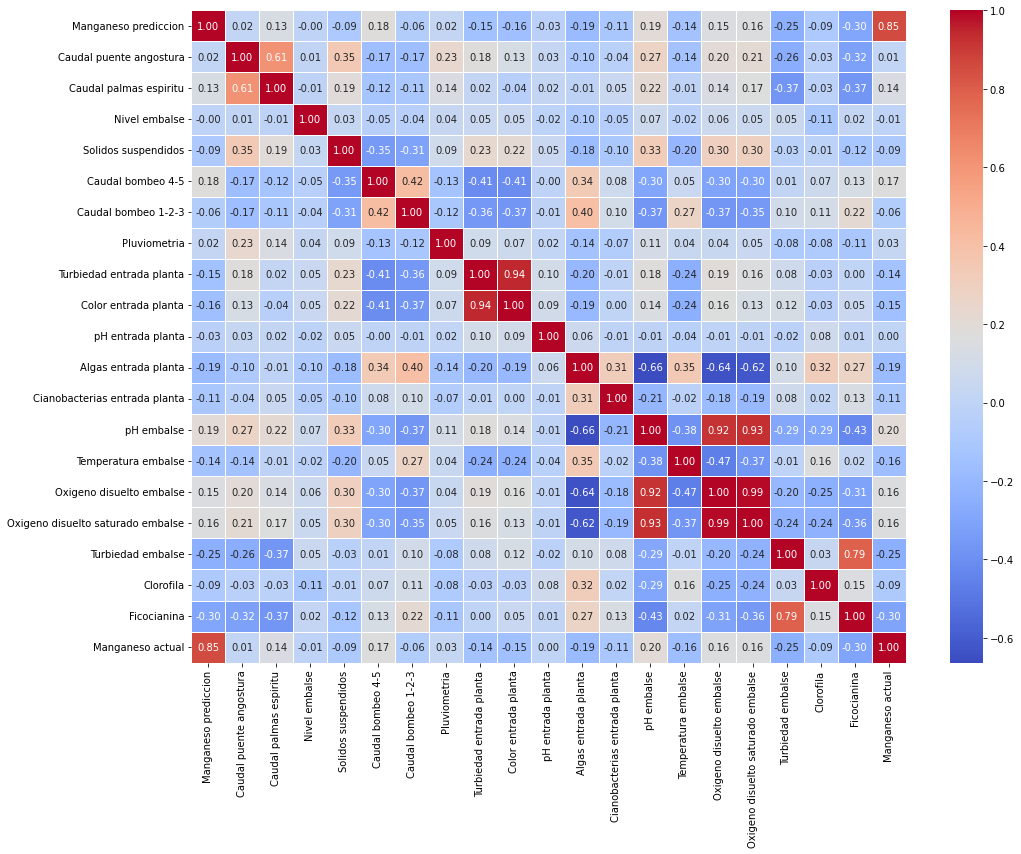

In [74]:
corr = datos_corr.corr()
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr,annot=True,fmt='.2f', cmap='coolwarm', linewidths=.5, annot_kws={'size': 10},ax=ax)

In [452]:
fig = px.line(datos, x='FECHA', y="Manganeso prediccion")
fig.add_hline(y=0.035)
fig.show()

In [99]:
fig = px.line(datos, x='FECHA', y="Turbiedad entrada planta")
fig.show()

In [453]:
datos.columns

Index(['FECHA', 'AÑO', 'Mes', 'DIA', 'Hora', 'Compuerta',
       'Manganeso prediccion', 'Manganeso actual', 'Manganeso previo',
       'Caudal puente angostura', 'Caudal palmas espiritu', 'Nivel embalse',
       'Solidos suspendidos', 'Caudal bombeo 4-5', 'Caudal bombeo 1-2-3',
       'Pluviometria', 'Turbiedad entrada planta', 'Color entrada planta',
       'pH entrada planta', 'FECHA2', 'Algas entrada planta',
       'Cianobacterias entrada planta', 'pH embalse', 'Temperatura embalse',
       'Oxigeno disuelto embalse', 'Oxigeno disuelto saturado embalse',
       'Turbiedad embalse', 'Clorofila', 'Ficocianina', 'Manganeso alerta',
       'Bombeos4-5', 'Bombeos1-2-3'],
      dtype='object')

In [75]:
fig = px.box(datos, x='Manganeso alerta', y='Caudal bombeo 4-5' , points="all")
fig.show()

In [76]:
fig = px.box(datos, x='Manganeso alerta', y='Caudal bombeo 1-2-3' , points="all")
fig.show()

In [ ]:
#Predicción alerta Manganeso

In [77]:
datos.columns

Index(['FECHA', 'AÑO', 'Mes', 'DIA', 'Hora', 'Compuerta',
       'Manganeso prediccion', 'Manganeso actual', 'Manganeso previo',
       'Caudal puente angostura', 'Caudal palmas espiritu', 'Nivel embalse',
       'Solidos suspendidos', 'Caudal bombeo 4-5', 'Caudal bombeo 1-2-3',
       'Pluviometria', 'Turbiedad entrada planta', 'Color entrada planta',
       'pH entrada planta', 'FECHA2', 'Algas entrada planta',
       'Cianobacterias entrada planta', 'pH embalse', 'Temperatura embalse',
       'Oxigeno disuelto embalse', 'Oxigeno disuelto saturado embalse',
       'Turbiedad embalse', 'Clorofila', 'Ficocianina', 'Manganeso alerta',
       'Bombeos4-5', 'Bombeos1-2-3'],
      dtype='object')

In [78]:
bomb = []
for a in range(len(datos)):
    if (datos['Caudal bombeo 4-5'][a]!=0 or datos['Caudal bombeo 1-2-3'][a]!=0):
        valor = 1
    else:
        valor = 0
    bomb.append(valor)
datos['Bombeos'] = bomb

In [104]:
X = datos.loc[:,['Compuerta','Manganeso actual','Hora','Mes','Solidos suspendidos','Pluviometria','pH embalse','Cianobacterias entrada planta','Temperatura embalse','Ficocianina','Turbiedad embalse','Oxigeno disuelto saturado embalse','Clorofila','Bombeos','Nivel embalse','Manganeso previo','Cianobacterias entrada planta','Turbiedad entrada planta','pH entrada planta','Color entrada planta','Algas entrada planta']]
Y = datos['Manganeso alerta']

In [101]:
selection = SelectKBest(score_func=f_classif,k='all')
selection.fit(X, Y)
selection

SelectKBest(k='all')

Feature 0: 127.710713
Feature 1: 3714.241218
Feature 2: 1089.107211
Feature 3: 53.531639
Feature 4: 60.750038
Feature 5: 108.253553


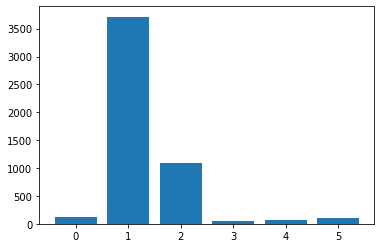

Text(0, 0.5, 'Variables')

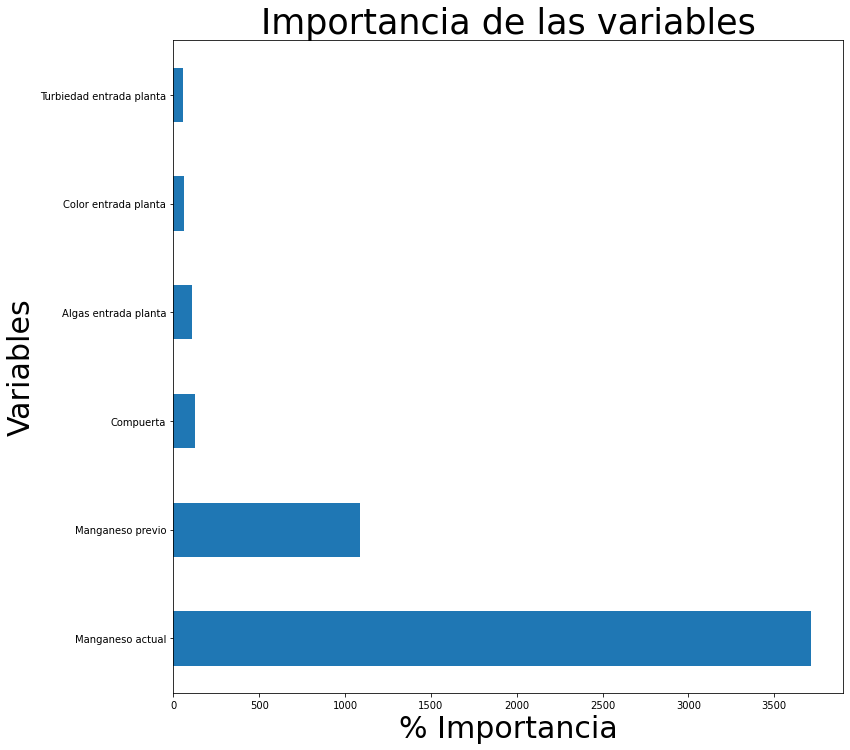

In [102]:
for i in range(len(selection.scores_)):
	print('Feature %d: %f' % (i, selection.scores_[i]))
plt.bar([i for i in range(len(selection.scores_))], selection.scores_)
plt.show()

plt.figure(figsize=(12,12),facecolor='w', edgecolor='k',num=1)
feat_importances = pd.Series(selection.scores_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')
parameters = {'axes.labelsize': 30,
          'axes.titlesize':50}
plt.rcParams.update(parameters)
plt.title('Importancia de las variables',fontsize=35)
plt.xlabel('% Importancia', fontsize=30)
plt.ylabel('Variables', fontsize=30)

In [107]:
#Variables según gráfica
X = datos.loc[:,['Compuerta','Manganeso actual','pH embalse','Temperatura embalse','Ficocianina','Turbiedad embalse','Oxigeno disuelto saturado embalse','Manganeso previo','Turbiedad entrada planta','Color entrada planta','Algas entrada planta']]
Y = datos['Manganeso alerta']

In [79]:
#Variables finales
X = datos.loc[:,['Compuerta','Manganeso actual','Manganeso previo','Turbiedad entrada planta', 'Color entrada planta','Algas entrada planta']]
Y = datos['Manganeso alerta']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20) 

In [81]:
log = LogisticRegression()
log.fit(X_train,y_train)
log_train_pred = log.predict(X_train)
log_test_pred = log.predict(X_test)

In [82]:
accuracy_score(y_train,log_train_pred)

0.9482997918112422

In [83]:
accuracy_score(y_test,log_test_pred)

0.9403606102635229

d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



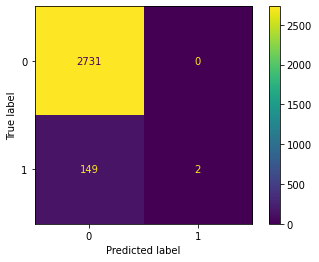

In [85]:
plot_confusion_matrix(log, X_train, y_train)  
plt.show()

d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



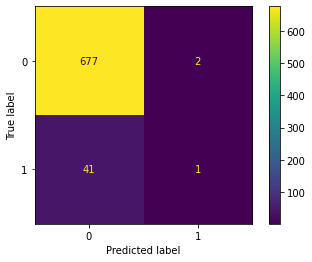

In [86]:
plot_confusion_matrix(log, X_test, y_test)  
plt.show()

In [90]:
report = classification_report(y_train,log_train_pred,output_dict=True)
report_log = pd.DataFrame(report).transpose()
report_log

,precision,recall,f1-score,support
0,0.948264,1.000000,0.973445,2731.0000
1,1.000000,0.013245,0.026144,151.0000
accuracy,0.948300,0.948300,0.948300,0.9483
macro avg,0.974132,0.506623,0.499794,2882.0000
weighted avg,0.950975,0.948300,0.923812,2882.0000


In [91]:
lr_balanced = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
lr_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=1, solver='newton-cg')

In [92]:
pred_lrb_train = lr_balanced.predict(X_train)
pred_lrb_test = lr_balanced.predict(X_test)

In [93]:
accuracy_score(y_train,pred_lrb_train)

0.8070784177654406

In [94]:
accuracy_score(y_test,pred_lrb_test)

0.8085991678224688

d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



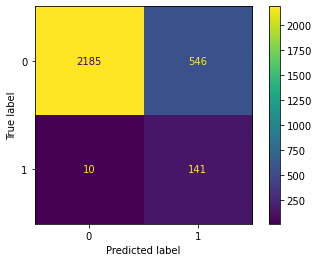

In [95]:
plot_confusion_matrix(lr_balanced, X_train, y_train)  
plt.show()

d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



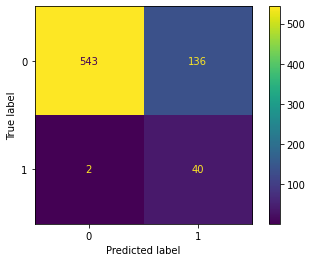

In [96]:
plot_confusion_matrix(lr_balanced, X_test, y_test)  
plt.show()

In [97]:
report = classification_report(y_train,pred_lrb_train,output_dict=True)
report_logb = pd.DataFrame(report).transpose()
report_logb

,precision,recall,f1-score,support
0,0.995444,0.800073,0.887130,2731.000000
1,0.205240,0.933775,0.336516,151.000000
accuracy,0.807078,0.807078,0.807078,0.807078
macro avg,0.600342,0.866924,0.611823,2882.000000
weighted avg,0.954042,0.807078,0.858281,2882.000000


In [121]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [122]:
pred_clf_train = clf.predict(X_train)
pred_clf_test = clf.predict(X_test)

In [123]:
accuracy_score(y_train,pred_clf_train)

0.9875086745315753

In [124]:
accuracy_score(y_test,pred_clf_test)

0.970873786407767

d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



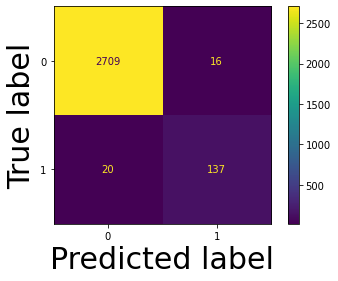

In [125]:
plot_confusion_matrix(clf, X_train, y_train)  
plt.show()

d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



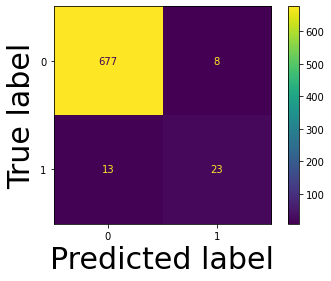

In [126]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [155]:
report = classification_report(y_train,pred_clf_train,output_dict=True)
report_clf = pd.DataFrame(report).transpose()
report_clf

,precision,recall,f1-score,support
0,0.992671,0.994128,0.993399,2725.000000
1,0.895425,0.872611,0.883871,157.000000
accuracy,0.987509,0.987509,0.987509,0.987509
macro avg,0.944048,0.933370,0.938635,2882.000000
weighted avg,0.987374,0.987509,0.987433,2882.000000


In [127]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [128]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [129]:
pred_rf_train = rf_random.predict(X_train)
pred_rf_test = rf_random.predict(X_test)

In [130]:
accuracy_score(y_train,pred_rf_train)

0.9899375433726578

In [131]:
accuracy_score(y_test,pred_rf_test)

0.9819694868238558

d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



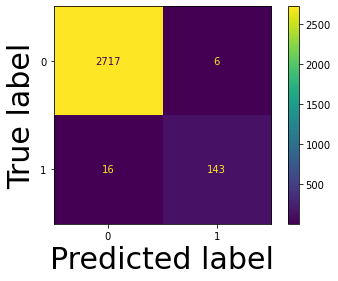

In [547]:
plot_confusion_matrix(rf_random, X_train, y_train)  
plt.show()

d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



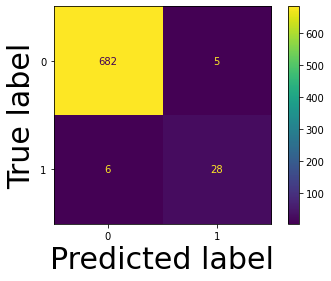

In [548]:
plot_confusion_matrix(rf_random, X_test, y_test)  
plt.show()

In [154]:
report = classification_report(y_train,pred_rf_train,output_dict=True)
report_lr = pd.DataFrame(report).transpose()
report_lr

,precision,recall,f1-score,support
0,0.991612,0.997798,0.994695,2725.000000
1,0.957143,0.853503,0.902357,157.000000
accuracy,0.989938,0.989938,0.989938,0.989938
macro avg,0.974377,0.925651,0.948526,2882.000000
weighted avg,0.989734,0.989938,0.989665,2882.000000


In [132]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   1.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.946 total time=   1.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.946 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.946 total time=   0.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   1.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.946 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.946 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.946 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.945 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [133]:
pred_svm_train = grid.predict(X_train)
pred_svm_test = grid.predict(X_test)

In [134]:
accuracy_score(y_train,pred_svm_train)

0.9805690492713394

In [136]:
accuracy_score(y_test,pred_svm_test)

0.9653259361997226

In [156]:
report = classification_report(y_train,pred_svm_train,output_dict=True)
report_svm = pd.DataFrame(report).transpose()
report_svm

,precision,recall,f1-score,support
0,0.982640,0.997064,0.989800,2725.000000
1,0.931624,0.694268,0.795620,157.000000
accuracy,0.980569,0.980569,0.980569,0.980569
macro avg,0.957132,0.845666,0.892710,2882.000000
weighted avg,0.979861,0.980569,0.979222,2882.000000


In [137]:
mlp_gs = MLPClassifier(max_iter=10000)

parameter_space = {
    'hidden_layer_sizes': [(10,300,10),(20,)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.01],
    'learning_rate': ['constant','adaptive'],
}

nn = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

nn.fit(X_train, y_train)

clf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'max_depth': [4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   15,
   20,
   30,
   40,
   50,
   70,
   90,
   120,
   150]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [138]:
pred_nn_train = nn.predict(X_train)
pred_nn_test = nn.predict(X_test)

In [139]:
accuracy_score(y_train,pred_nn_train)

0.9677307425399029

In [140]:
accuracy_score(y_test,pred_nn_test)

0.9639389736477115

In [157]:
report = classification_report(y_train,pred_nn_train,output_dict=True)
report_nn = pd.DataFrame(report).transpose()
report_nn

,precision,recall,f1-score,support
0,0.969330,0.997431,0.983180,2725.000000
1,0.910256,0.452229,0.604255,157.000000
accuracy,0.967731,0.967731,0.967731,0.967731
macro avg,0.939793,0.724830,0.793717,2882.000000
weighted avg,0.966111,0.967731,0.962537,2882.000000


In [141]:
model_xg = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [142]:
pred_xg_train = model_xg.predict(X_train)
pred_xg_test = model_xg.predict(X_test)

In [143]:
accuracy_score(y_train,pred_xg_train)

0.9996530187369882

In [144]:
accuracy_score(y_test,pred_xg_test)

0.9819694868238558

In [158]:
report = classification_report(y_train,pred_xg_train,output_dict=True)
report_xg = pd.DataFrame(report).transpose()
report_xg

,precision,recall,f1-score,support
0,0.999633,1.000000,0.999817,2725.000000
1,1.000000,0.993631,0.996805,157.000000
accuracy,0.999653,0.999653,0.999653,0.999653
macro avg,0.999817,0.996815,0.998311,2882.000000
weighted avg,0.999653,0.999653,0.999652,2882.000000


d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



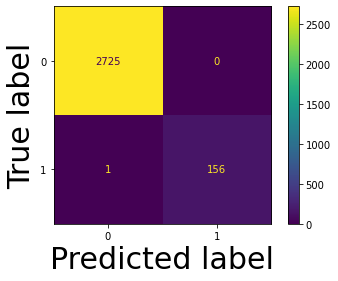

In [160]:
plot_confusion_matrix(model_xg, X_train, y_train)  
plt.show()

d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



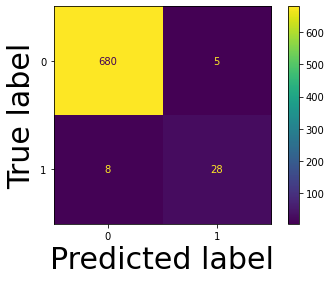

In [159]:
plot_confusion_matrix(model_xg, X_test, y_test)  
plt.show()

In [149]:
voting_classifier = VotingClassifier(estimators=[
         ('random_forest', rf_random), ('neural_network', nn),('xg_bosting', model_xg),('support_vector_machine', grid)], voting='hard')
voting_model = voting_classifier.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [151]:
accuracy_score(y_train,pred_vm_train)

0.991325468424705

In [152]:
accuracy_score(y_test,pred_vm_test)

0.9778085991678225

In [2]:
datos_turbiedad = pd.read_excel('CalidadAgua_LaFE_Ayura.xlsx',sheet_name='MP6')
datos_turbiedad.head(10)

,FECHA,AÑO,MES,DIA,HORA,COMPUERTA,CAUDAL PUENTE ANGOSTURA,CAUDAL PALMAS_ESPIRITU,NIVEL,SOLIDOS,...,PH_PLANTA,ALGAS,CIANOBACTERIAS,PH_EMBALSE,TEMPERATURA_EMBALSE,OD_EMBALSE,ODS_EMBALSE,TURBIEDAD,CLOROFILA,FICOCIANINA
0,2020/1/1 0,2020.0,1.0,1.0,0.0,1.0,3.656927,2.548388,2155.386053,1399.346591,...,6.59,400.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/1/1 1,2020.0,1.0,1.0,1.0,1.0,3.453317,2.512461,2155.381689,1198.125000,...,6.59,400.0,333.0,7.33,22.29,5.52,63.49,0.4,3.49,0.09
2,2020/1/1 2,2020.0,1.0,1.0,2.0,1.0,3.312000,2.479276,2155.377441,953.203125,...,6.59,400.0,333.0,7.30,22.72,5.60,64.66,0.3,6.32,NaN
3,2020/1/1 3,2020.0,1.0,1.0,3.0,1.0,3.140183,2.458617,2155.373291,589.062500,...,6.59,400.0,333.0,7.20,22.81,5.57,64.61,0.0,7.01,7.94
4,2020/1/1 4,2020.0,1.0,1.0,4.0,1.0,3.044750,2.432367,2155.369718,420.852267,...,6.59,400.0,333.0,7.19,23.03,5.56,64.76,NaN,NaN,NaN
5,2020/1/1 5,2020.0,1.0,1.0,5.0,1.0,2.964133,2.423562,2155.365031,NaN,...,6.88,400.0,333.0,7.30,22.75,5.75,66.70,0.5,3.72,NaN
6,2020/1/1 6,2020.0,1.0,1.0,6.0,1.0,2.915617,2.405622,2155.362549,102.031250,...,6.88,400.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020/1/1 7,2020.0,1.0,1.0,7.0,1.0,2.852067,2.393694,2155.366655,157.414773,...,6.69,400.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020/1/1 8,2020.0,1.0,1.0,8.0,1.0,2.803550,2.382239,2155.371436,145.875000,...,6.69,400.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020/1/1 9,2020.0,1.0,1.0,9.0,1.0,2.757083,2.375051,2155.374365,116.531247,...,6.71,400.0,333.0,7.50,22.20,5.55,63.70,0.5,3.90,0.57


In [104]:
datos_turbiedad.columns

Index(['FECHA', 'AÑO', 'MES', 'DIA', 'HORA', 'COMPUERTA',
       'CAUDAL PUENTE ANGOSTURA', 'CAUDAL PALMAS_ESPIRITU', 'NIVEL', 'SOLIDOS',
       'CAUDALB45', 'CAUDALB123', 'PLUVIOMETRIA_DIA', 'TURBIEDAD_PREDICCION',
       'TURBIEDAD PLANTA', 'COLOR_PLANTA', 'PH_PLANTA', 'ALGAS',
       'CIANOBACTERIAS', 'PH_EMBALSE', 'TEMPERATURA_EMBALSE', 'OD_EMBALSE',
       'ODS_EMBALSE', 'TURBIEDAD', 'CLOROFILA', 'FICOCIANINA'],
      dtype='object')

In [3]:
datos_turbiedad.rename(columns={'CAUDAL PUENTE ANGOSTURA':'Caudal puente angostura','CAUDAL PALMAS_ESPIRITU':'Caudal palmas espiritu','SOLIDOS':'Solidos suspendidos','CAUDALB45':'Caudal bombeo 4-5','PLUVIOMETRIA_DIA':'Pluviometria',
'CAUDALB123':'Caudal bombeo 1-2-3','TURBIEDAD_PREDICCION':'Turbiedad entrada planta prediccion','TURBIEDAD PLANTA':'Turbiedad entrada planta','COLOR_PLANTA':'Color entrada planta',
'PH_PLANTA':'pH entrada planta','ALGAS':'Algas entrada planta','CIANOBACTERIAS':'Cianobacterias entrada planta','PH_EMBALSE':'pH embalse','TEMPERATURA_EMBALSE':'Temperatura embalse',
'OD_EMBALSE':'Oxigeno disuelto embalse','ODS_EMBALSE':'Oxigeno disuelto saturado embalse','TURBIEDAD':'Turbiedad embalse','CLOROFILA':'Clorofila','FICOCIANINA':'Ficocianina',
'MES':'Mes','HORA':'Hora','COMPUERTA':'Compuerta','NIVEL':'Nivel embalse'},
inplace=True)

In [4]:
datos_turbiedad['Caudal puente angostura'][datos_turbiedad['Caudal puente angostura']>datos_turbiedad['Caudal puente angostura'].quantile(0.98)] = datos_turbiedad['Caudal puente angostura'].quantile(0.98)
datos_turbiedad['Caudal puente angostura'][datos_turbiedad['Caudal puente angostura']<datos_turbiedad['Caudal puente angostura'].quantile(0.05)] = datos_turbiedad['Caudal puente angostura'].quantile(0.05)
datos_turbiedad['Caudal palmas espiritu'][datos_turbiedad['Caudal palmas espiritu']>datos_turbiedad['Caudal palmas espiritu'].quantile(0.98)] = datos_turbiedad['Caudal palmas espiritu'].quantile(0.98)
datos_turbiedad['Caudal palmas espiritu'][datos_turbiedad['Caudal palmas espiritu']<datos_turbiedad['Caudal palmas espiritu'].quantile(0.05)] = datos_turbiedad['Caudal palmas espiritu'].quantile(0.05)
datos_turbiedad['Solidos suspendidos'][datos_turbiedad['Solidos suspendidos']>datos_turbiedad['Solidos suspendidos'].quantile(0.98)] = datos_turbiedad['Solidos suspendidos'].quantile(0.98)
datos_turbiedad['Solidos suspendidos'][datos_turbiedad['Solidos suspendidos']<datos_turbiedad['Solidos suspendidos'].quantile(0.05)] = datos_turbiedad['Solidos suspendidos'].quantile(0.05)
datos_turbiedad['Caudal bombeo 4-5'][datos_turbiedad['Caudal bombeo 4-5']>datos_turbiedad['Caudal bombeo 4-5'].quantile(0.98)] = datos_turbiedad['Caudal bombeo 4-5'].quantile(0.98)
datos_turbiedad['Caudal bombeo 4-5'][datos_turbiedad['Caudal bombeo 4-5']<datos_turbiedad['Caudal bombeo 4-5'].quantile(0.05)] = datos_turbiedad['Caudal bombeo 4-5'].quantile(0.05)
datos_turbiedad['Caudal bombeo 1-2-3'][datos_turbiedad['Caudal bombeo 1-2-3']>datos_turbiedad['Caudal bombeo 1-2-3'].quantile(0.98)] = datos_turbiedad['Caudal bombeo 1-2-3'].quantile(0.98)
datos_turbiedad['Caudal bombeo 1-2-3'][datos_turbiedad['Caudal bombeo 1-2-3']<datos_turbiedad['Caudal bombeo 1-2-3'].quantile(0.05)] = datos_turbiedad['Caudal bombeo 1-2-3'].quantile(0.05)
datos_turbiedad['Pluviometria'][datos_turbiedad['Pluviometria']>datos_turbiedad['Pluviometria'].quantile(0.98)] = datos_turbiedad['Pluviometria'].quantile(0.98)
datos_turbiedad['Pluviometria'][datos_turbiedad['Pluviometria']<datos_turbiedad['Pluviometria'].quantile(0.05)] = datos_turbiedad['Pluviometria'].quantile(0.05)
datos_turbiedad['Turbiedad entrada planta prediccion'][datos_turbiedad['Turbiedad entrada planta prediccion']>datos_turbiedad['Turbiedad entrada planta prediccion'].quantile(0.98)] = datos_turbiedad['Turbiedad entrada planta prediccion'].quantile(0.98)
datos_turbiedad['Turbiedad entrada planta prediccion'][datos_turbiedad['Turbiedad entrada planta prediccion']<datos_turbiedad['Turbiedad entrada planta prediccion'].quantile(0.05)] = datos_turbiedad['Turbiedad entrada planta prediccion'].quantile(0.05)
datos_turbiedad['Turbiedad entrada planta'][datos_turbiedad['Turbiedad entrada planta']>datos_turbiedad['Turbiedad entrada planta'].quantile(0.98)] = datos_turbiedad['Turbiedad entrada planta'].quantile(0.98)
datos_turbiedad['Turbiedad entrada planta'][datos_turbiedad['Turbiedad entrada planta']<datos_turbiedad['Turbiedad entrada planta'].quantile(0.05)] = datos_turbiedad['Turbiedad entrada planta'].quantile(0.05)
datos_turbiedad['Color entrada planta'][datos_turbiedad['Color entrada planta']>datos_turbiedad['Color entrada planta'].quantile(0.98)] = datos_turbiedad['Color entrada planta'].quantile(0.98)
datos_turbiedad['Color entrada planta'][datos_turbiedad['Color entrada planta']<datos_turbiedad['Color entrada planta'].quantile(0.05)] = datos_turbiedad['Color entrada planta'].quantile(0.05)
datos_turbiedad['pH entrada planta'][datos_turbiedad['pH entrada planta']>datos_turbiedad['pH entrada planta'].quantile(0.98)] = datos_turbiedad['pH entrada planta'].quantile(0.98)
datos_turbiedad['pH entrada planta'][datos_turbiedad['pH entrada planta']<datos_turbiedad['pH entrada planta'].quantile(0.05)] = datos_turbiedad['pH entrada planta'].quantile(0.05)
datos_turbiedad['Algas entrada planta'][datos_turbiedad['Algas entrada planta']>datos_turbiedad['Algas entrada planta'].quantile(0.98)] = datos_turbiedad['Algas entrada planta'].quantile(0.98)
datos_turbiedad['Algas entrada planta'][datos_turbiedad['Algas entrada planta']<datos_turbiedad['Algas entrada planta'].quantile(0.05)] = datos_turbiedad['Algas entrada planta'].quantile(0.05)
datos_turbiedad['Cianobacterias entrada planta'][datos_turbiedad['Cianobacterias entrada planta']>datos_turbiedad['Cianobacterias entrada planta'].quantile(0.98)] = datos_turbiedad['Cianobacterias entrada planta'].quantile(0.98)
datos_turbiedad['Cianobacterias entrada planta'][datos_turbiedad['Cianobacterias entrada planta']<datos_turbiedad['Cianobacterias entrada planta'].quantile(0.05)] = datos_turbiedad['Cianobacterias entrada planta'].quantile(0.05)
datos_turbiedad['pH embalse'][datos_turbiedad['pH embalse']>datos_turbiedad['pH embalse'].quantile(0.98)] = datos_turbiedad['pH embalse'].quantile(0.98)
datos_turbiedad['pH embalse'][datos_turbiedad['pH embalse']<datos_turbiedad['pH embalse'].quantile(0.05)] = datos_turbiedad['pH embalse'].quantile(0.05)
datos_turbiedad['Temperatura embalse'][datos_turbiedad['Temperatura embalse']>datos_turbiedad['Temperatura embalse'].quantile(0.98)] = datos_turbiedad['Temperatura embalse'].quantile(0.98)
datos_turbiedad['Temperatura embalse'][datos_turbiedad['Temperatura embalse']<datos_turbiedad['Temperatura embalse'].quantile(0.05)] = datos_turbiedad['Temperatura embalse'].quantile(0.05)
datos_turbiedad['Oxigeno disuelto embalse'][datos_turbiedad['Oxigeno disuelto embalse']>datos_turbiedad['Oxigeno disuelto embalse'].quantile(0.98)] = datos_turbiedad['Oxigeno disuelto embalse'].quantile(0.98)
datos_turbiedad['Oxigeno disuelto embalse'][datos_turbiedad['Oxigeno disuelto embalse']<datos_turbiedad['Oxigeno disuelto embalse'].quantile(0.05)] = datos_turbiedad['Oxigeno disuelto embalse'].quantile(0.05)
datos_turbiedad['Oxigeno disuelto saturado embalse'][datos_turbiedad['Oxigeno disuelto saturado embalse']>datos_turbiedad['Oxigeno disuelto saturado embalse'].quantile(0.98)] = datos_turbiedad['Oxigeno disuelto saturado embalse'].quantile(0.98)
datos_turbiedad['Oxigeno disuelto saturado embalse'][datos_turbiedad['Oxigeno disuelto saturado embalse']<datos_turbiedad['Oxigeno disuelto saturado embalse'].quantile(0.05)] = datos_turbiedad['Oxigeno disuelto saturado embalse'].quantile(0.05)
datos_turbiedad['Turbiedad embalse'][datos_turbiedad['Turbiedad embalse']>datos_turbiedad['Turbiedad embalse'].quantile(0.98)] = datos_turbiedad['Turbiedad embalse'].quantile(0.98)
datos_turbiedad['Turbiedad embalse'][datos_turbiedad['Turbiedad embalse']<datos_turbiedad['Turbiedad embalse'].quantile(0.05)] = datos_turbiedad['Turbiedad embalse'].quantile(0.05)
datos_turbiedad['Clorofila'][datos_turbiedad['Clorofila']>datos_turbiedad['Clorofila'].quantile(0.98)] = datos_turbiedad['Clorofila'].quantile(0.98)
datos_turbiedad['Clorofila'][datos_turbiedad['Clorofila']<datos_turbiedad['Clorofila'].quantile(0.05)] = datos_turbiedad['Clorofila'].quantile(0.05)
datos_turbiedad['Ficocianina'][datos_turbiedad['Ficocianina']>datos_turbiedad['Ficocianina'].quantile(0.98)] = datos_turbiedad['Ficocianina'].quantile(0.98)
datos_turbiedad['Ficocianina'][datos_turbiedad['Ficocianina']<datos_turbiedad['Ficocianina'].quantile(0.05)] = datos_turbiedad['Ficocianina'].quantile(0.05)

C:\Users\squintra\AppData\Local\Temp\ipykernel_14092\3482398943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_turbiedad['Caudal puente angostura'][datos_turbiedad['Caudal puente angostura']>datos_turbiedad['Caudal puente angostura'].quantile(0.98)] = datos_turbiedad['Caudal puente angostura'].quantile(0.98)
C:\Users\squintra\AppData\Local\Temp\ipykernel_14092\3482398943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_turbiedad['Caudal puente angostura'][datos_turbiedad['Caudal puente angostura']<datos_turbiedad['Caudal puente angostura'].quantile(0.05)] = datos_turbiedad['Caudal puente angostura']

In [5]:
datos_turbiedad['Caudal puente angostura'] = datos_turbiedad['Caudal puente angostura'].interpolate(method='linear')
datos_turbiedad['Caudal palmas espiritu'] = datos_turbiedad['Caudal palmas espiritu'].interpolate(method='linear')
datos_turbiedad['Solidos suspendidos'] = datos_turbiedad['Solidos suspendidos'].interpolate(method='linear')
datos_turbiedad['Algas entrada planta'] = datos_turbiedad['Algas entrada planta'].interpolate(method='linear')
datos_turbiedad['Cianobacterias entrada planta'] = datos_turbiedad['Cianobacterias entrada planta'].interpolate(method='linear')
datos_turbiedad['pH embalse'] = datos_turbiedad['pH embalse'].interpolate(method='linear')
datos_turbiedad['Temperatura embalse'] = datos_turbiedad['Temperatura embalse'].interpolate(method='linear')
datos_turbiedad['Oxigeno disuelto embalse'] = datos_turbiedad['Oxigeno disuelto embalse'].interpolate(method='linear')
datos_turbiedad['Oxigeno disuelto saturado embalse'] = datos_turbiedad['Oxigeno disuelto saturado embalse'].interpolate(method='linear')
datos_turbiedad['Turbiedad embalse'] = datos_turbiedad['Turbiedad embalse'].interpolate(method='linear')
datos_turbiedad['Clorofila'] = datos_turbiedad['Clorofila'].interpolate(method='linear')
datos_turbiedad['Ficocianina'] = datos_turbiedad['Ficocianina'].interpolate(method='linear')
datos_turbiedad['Caudal bombeo 4-5'] = datos_turbiedad['Caudal bombeo 4-5'].interpolate(method='linear')
datos_turbiedad['Caudal bombeo 1-2-3'] = datos_turbiedad['Caudal bombeo 1-2-3'].interpolate(method='linear')
datos_turbiedad['Pluviometria'] = datos_turbiedad['Pluviometria'].interpolate(method='linear')
datos_turbiedad['Turbiedad entrada planta prediccion'] = datos_turbiedad['Turbiedad entrada planta prediccion'].interpolate(method='linear')
datos_turbiedad['Turbiedad entrada planta'] = datos_turbiedad['Turbiedad entrada planta'].interpolate(method='linear')
datos_turbiedad['Color entrada planta'] = datos_turbiedad['Color entrada planta'].interpolate(method='linear')
datos_turbiedad['pH entrada planta'] = datos_turbiedad['pH entrada planta'].interpolate(method='linear')

In [6]:
datos_turbiedad['Caudal puente angostura'].fillna(method='ffill',inplace=True)
datos_turbiedad['Caudal palmas espiritu'].fillna(method='ffill',inplace=True)
datos_turbiedad['Solidos suspendidos'].fillna(method='ffill',inplace=True)
datos_turbiedad['Algas entrada planta'].fillna(method='ffill',inplace=True)
datos_turbiedad['Cianobacterias entrada planta'].fillna(method='ffill',inplace=True)
datos_turbiedad['pH embalse'].fillna(method='ffill',inplace=True)
datos_turbiedad['Temperatura embalse'].fillna(method='ffill',inplace=True)
datos_turbiedad['Oxigeno disuelto embalse'].fillna(method='ffill',inplace=True)
datos_turbiedad['Oxigeno disuelto saturado embalse'].fillna(method='ffill',inplace=True)
datos_turbiedad['Turbiedad embalse'].fillna(method='ffill',inplace=True)
datos_turbiedad['Clorofila'].fillna(method='ffill',inplace=True)
datos_turbiedad['Ficocianina'].fillna(method='ffill',inplace=True)
datos_turbiedad['Caudal bombeo 4-5'].fillna(method='ffill',inplace=True)
datos_turbiedad['Caudal bombeo 1-2-3'].fillna(method='ffill',inplace=True)
datos_turbiedad['Pluviometria'].fillna(method='ffill',inplace=True)
datos_turbiedad['Turbiedad entrada planta prediccion'].fillna(method='ffill',inplace=True)
datos_turbiedad['Turbiedad entrada planta'].fillna(method='ffill',inplace=True)
datos_turbiedad['Color entrada planta'].fillna(method='ffill',inplace=True)
datos_turbiedad['pH entrada planta'].fillna(method='ffill',inplace=True)
datos_turbiedad['Nivel embalse'].fillna(method='ffill',inplace=True)


In [7]:
datos_turbiedad['Caudal puente angostura'].fillna(method='bfill',inplace=True)
datos_turbiedad['Caudal palmas espiritu'].fillna(method='bfill',inplace=True)
datos_turbiedad['Solidos suspendidos'].fillna(method='bfill',inplace=True)
datos_turbiedad['Algas entrada planta'].fillna(method='bfill',inplace=True)
datos_turbiedad['Cianobacterias entrada planta'].fillna(method='bfill',inplace=True)
datos_turbiedad['pH embalse'].fillna(method='bfill',inplace=True)
datos_turbiedad['Temperatura embalse'].fillna(method='bfill',inplace=True)
datos_turbiedad['Oxigeno disuelto embalse'].fillna(method='bfill',inplace=True)
datos_turbiedad['Oxigeno disuelto saturado embalse'].fillna(method='bfill',inplace=True)
datos_turbiedad['Turbiedad embalse'].fillna(method='bfill',inplace=True)
datos_turbiedad['Clorofila'].fillna(method='bfill',inplace=True)
datos_turbiedad['Ficocianina'].fillna(method='bfill',inplace=True)
datos_turbiedad['Caudal bombeo 4-5'].fillna(method='bfill',inplace=True)
datos_turbiedad['Caudal bombeo 1-2-3'].fillna(method='bfill',inplace=True)
datos_turbiedad['Pluviometria'].fillna(method='bfill',inplace=True)
datos_turbiedad['Turbiedad entrada planta prediccion'].fillna(method='bfill',inplace=True)
datos_turbiedad['Turbiedad entrada planta'].fillna(method='bfill',inplace=True)
datos_turbiedad['Color entrada planta'].fillna(method='bfill',inplace=True)
datos_turbiedad['pH entrada planta'].fillna(method='bfill',inplace=True)
datos_turbiedad['Nivel embalse'].fillna(method='bfill',inplace=True)


In [8]:
datos_turbiedad.dropna(axis=0,inplace=True)

In [111]:
datos_turbiedad.isnull().sum()

FECHA                                  0
AÑO                                    0
Mes                                    0
DIA                                    0
Hora                                   0
Compuerta                              0
Caudal puente angostura                0
Caudal palmas espiritu                 0
Nivel embalse                          0
Solidos suspendidos                    0
Caudal bombeo 4-5                      0
Caudal bombeo 1-2-3                    0
Pluviometria                           0
Turbiedad entrada planta prediccion    0
Turbiedad entrada planta               0
Color entrada planta                   0
pH entrada planta                      0
Algas entrada planta                   0
Cianobacterias entrada planta          0
pH embalse                             0
Temperatura embalse                    0
Oxigeno disuelto embalse               0
Oxigeno disuelto saturado embalse      0
Turbiedad embalse                      0
Clorofila       

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import 

In [113]:
datos_turbiedad.columns

Index(['FECHA', 'AÑO', 'Mes', 'DIA', 'Hora', 'Compuerta',
       'Caudal puente angostura', 'Caudal palmas espiritu', 'Nivel embalse',
       'Solidos suspendidos', 'Caudal bombeo 4-5', 'Caudal bombeo 1-2-3',
       'Pluviometria', 'Turbiedad entrada planta prediccion',
       'Turbiedad entrada planta', 'Color entrada planta', 'pH entrada planta',
       'Algas entrada planta', 'Cianobacterias entrada planta', 'pH embalse',
       'Temperatura embalse', 'Oxigeno disuelto embalse',
       'Oxigeno disuelto saturado embalse', 'Turbiedad embalse', 'Clorofila',
       'Ficocianina'],
      dtype='object')

In [11]:
X_t= datos_turbiedad.loc[:,['Mes','Hora', 'Compuerta','Caudal puente angostura', 'Caudal palmas espiritu', 'Nivel embalse','Solidos suspendidos', 'Caudal bombeo 4-5', 'Caudal bombeo 1-2-3',
       'Pluviometria','Turbiedad entrada planta', 'Color entrada planta', 'pH entrada planta','Algas entrada planta', 'Cianobacterias entrada planta', 'pH embalse',
       'Temperatura embalse', 'Oxigeno disuelto embalse','Oxigeno disuelto saturado embalse', 'Turbiedad embalse', 'Clorofila','Ficocianina']]
Y_t = datos_turbiedad['Turbiedad entrada planta prediccion']

In [185]:
selection = SelectKBest(score_func=f_classif,k='all')
selection.fit(X_t, Y_t)
selection

SelectKBest(k='all')

Feature 0: 4.293293
Feature 1: 1.181231
Feature 2: 2.615144
Feature 3: 2.890444
Feature 4: 1.800805
Feature 5: 0.404980
Feature 6: 3.521109
Feature 7: 8.665592
Feature 8: 6.371125
Feature 9: 1.670898
Feature 10: 51.309606
Feature 11: 39.177804
Feature 12: 2.256628
Feature 13: 3.601891
Feature 14: 1.616994
Feature 15: 3.347126
Feature 16: 2.975875
Feature 17: 3.967668
Feature 18: 3.879740
Feature 19: 1.478371
Feature 20: 1.805714
Feature 21: 1.413933


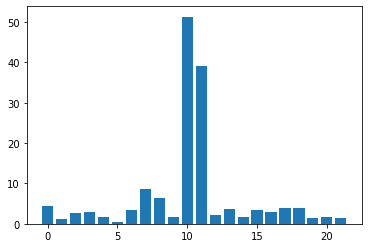

Text(0, 0.5, 'Variables')

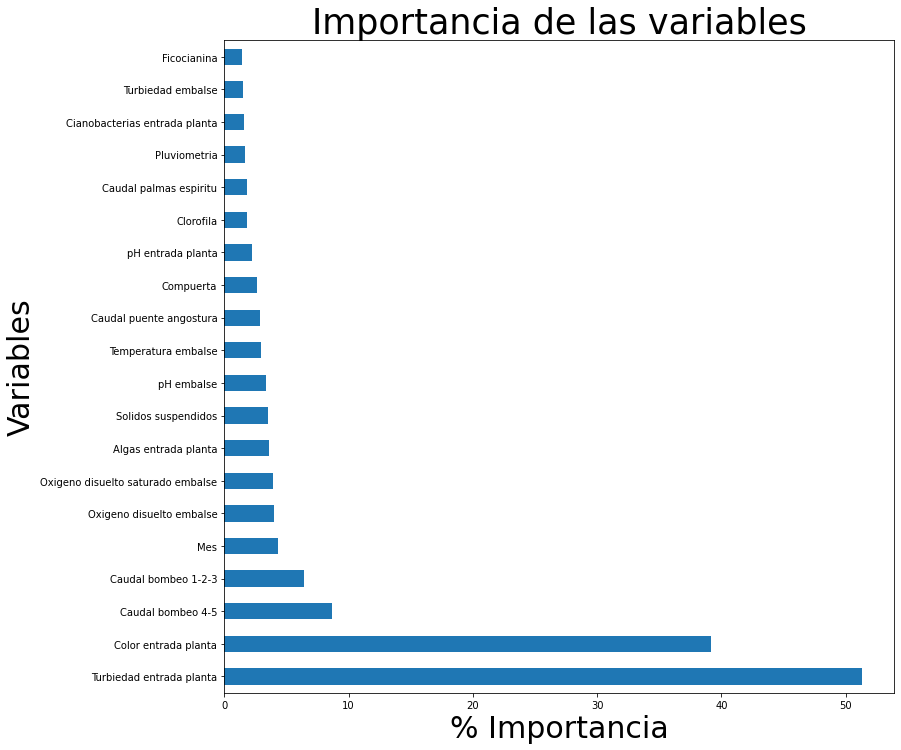

In [186]:
for i in range(len(selection.scores_)):
	print('Feature %d: %f' % (i, selection.scores_[i]))
plt.bar([i for i in range(len(selection.scores_))], selection.scores_)
plt.show()

plt.figure(figsize=(12,12),facecolor='w', edgecolor='k',num=1)
feat_importances = pd.Series(selection.scores_, index= X_t.columns)
feat_importances.nlargest(20).plot(kind='barh')
parameters = {'axes.labelsize': 30,
          'axes.titlesize':50}
plt.rcParams.update(parameters)
plt.title('Importancia de las variables',fontsize=35)
plt.xlabel('% Importancia', fontsize=30)
plt.ylabel('Variables', fontsize=30)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_t,Y_t,test_size=0.20) 

In [116]:
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeRegressor(), tree_para, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [117]:
pred_clf_train = clf.predict(X_train)
pred_clf_test = clf.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

In [119]:
r2_score(y_train,pred_clf_train)

0.9365941087044484

In [124]:
r2_score(y_test,pred_clf_test)

0.7623826010975349

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [122]:
mean_squared_error(y_train, pred_clf_train)

11.983437125060208

In [125]:
mean_absolute_error(y_train, pred_clf_train)

1.7227145737919707

In [123]:
mean_squared_error(y_test, pred_clf_test)

44.07893144761571

In [127]:
mean_absolute_error(y_test, pred_clf_test)

2.659697459537912

In [15]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

In [16]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=22, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=22, verbose=2)

In [17]:
pred_rf_train = rf_random.predict(X_train)
pred_rf_test = rf_random.predict(X_test)

In [18]:
r2_score(y_train,pred_rf_train)

0.9934500455079069

In [19]:
r2_score(y_test,pred_rf_test)

0.9208159321598215

In [20]:
mean_squared_error(y_train, pred_rf_train)

1.2574781213917965

In [21]:
mean_squared_error(y_test, pred_rf_test)

13.730373619730361

In [22]:
mean_absolute_error(y_train, pred_rf_train)

0.36704020583917313

In [23]:
mean_absolute_error(y_test, pred_rf_test)

1.5175528688876772

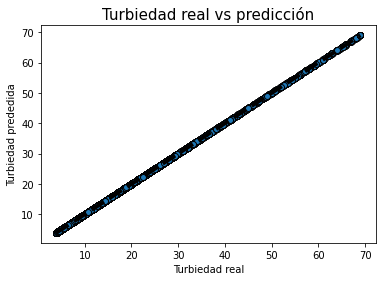

In [639]:
fig, ax = plt.subplots()
ax.scatter(y_train, pred_rf_train, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Turbiedad real', fontsize=10)
ax.set_ylabel('Turbiedad prededida', fontsize=10)
ax.set_title('Turbiedad real vs predicción', fontsize=15)
plt.show()

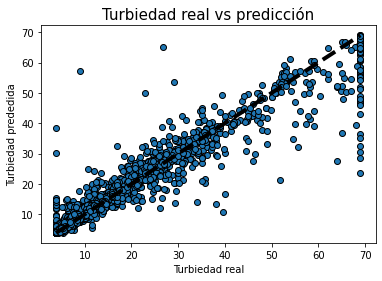

In [24]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_rf_test, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Turbiedad real', fontsize=10)
ax.set_ylabel('Turbiedad prededida', fontsize=10)
ax.set_title('Turbiedad real vs predicción', fontsize=15)
plt.show()

In [25]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.171 total time=  16.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.159 total time=  16.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.173 total time=  16.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.135 total time=  18.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.154 total time=  16.7s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.169 total time=  16.6s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.157 total time=  16.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.171 total time=  15.8s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.133 total time=  15.6s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.153 total time=  15.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.162 total time=  14.9s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
pred_sv_train = grid.predict(X_train)
pred_sv_test = grid.predict(X_test)

In [27]:
r2_score(y_train,pred_sv_train)

0.9280209434072335

In [28]:
r2_score(y_test,pred_sv_test)

0.7157563806750158

In [29]:
mean_squared_error(y_train, pred_sv_train)

13.818735530619232

In [30]:
mean_squared_error(y_test, pred_sv_test)

49.287327600213935

In [31]:
mean_absolute_error(y_train, pred_sv_train)

0.8732839953388971

In [32]:
mean_absolute_error(y_test, pred_sv_test)

2.9812431686043777

In [33]:
model_xgr = XGBRegressor(use_label_encoder=False, eval_metric='mlogloss')
model_xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mlogloss', gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [34]:
pred_xgr_train = model_xgr.predict(X_train)
pred_xgr_test = model_xgr.predict(X_test)

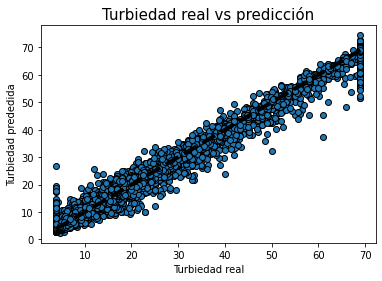

In [60]:
fig, ax = plt.subplots()
ax.scatter(y_train, pred_xgr_train, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Turbiedad real', fontsize=10)
ax.set_ylabel('Turbiedad prededida', fontsize=10)
ax.set_title('Turbiedad real vs predicción', fontsize=15)
plt.show()

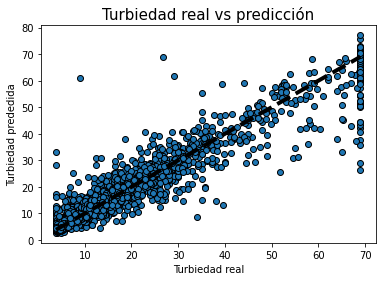

In [61]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_xgr_test, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Turbiedad real', fontsize=10)
ax.set_ylabel('Turbiedad prededida', fontsize=10)
ax.set_title('Turbiedad real vs predicción', fontsize=15)
plt.show()

In [35]:
r2_score(y_train,pred_xgr_train)

0.9822766835260224

In [36]:
r2_score(y_test,pred_xgr_test)

0.9035071147758923

In [37]:
mean_squared_error(y_train, pred_xgr_train)

3.4025706180758144

In [38]:
mean_squared_error(y_test, pred_xgr_test)

16.73169113320678

In [39]:
mean_absolute_error(y_train, pred_xgr_train)

1.151833380622188

In [40]:
mean_absolute_error(y_test, pred_xgr_test)

2.086653262063044

In [41]:
mlp_gs = MLPRegressor(max_iter=10000)

parameter_space = {
    'hidden_layer_sizes': [(10,300,10),(20,)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.01],
    'learning_rate': ['constant','adaptive'],
}

nn = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

nn.fit(X_train, y_train)

d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "d:\Analitica\Manganeso\manganeso\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 448, in

NameError: name 'clf' is not defined

In [42]:
pred_nnr_train = nn.predict(X_train)
pred_nnr_test = nn.predict(X_test)

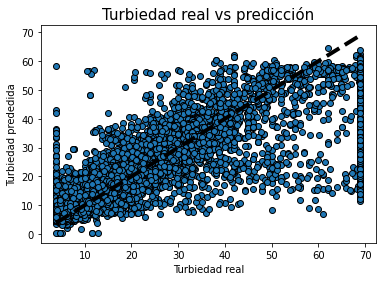

In [43]:
fig, ax = plt.subplots()
ax.scatter(y_train, pred_nnr_train, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Turbiedad real', fontsize=10)
ax.set_ylabel('Turbiedad prededida', fontsize=10)
ax.set_title('Turbiedad real vs predicción', fontsize=15)
plt.show()

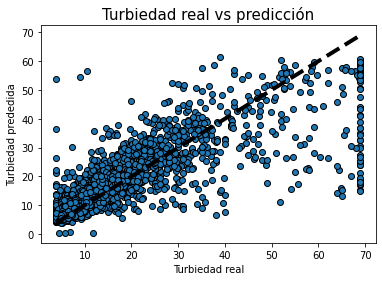

In [44]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_nnr_test, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Turbiedad real', fontsize=10)
ax.set_ylabel('Turbiedad prededida', fontsize=10)
ax.set_title('Turbiedad real vs predicción', fontsize=15)
plt.show()

In [45]:
r2_score(y_train,pred_nnr_train)

0.7169565083544691

In [46]:
r2_score(y_test,pred_nnr_test)

0.7021051967918615

In [47]:
mean_squared_error(y_train, pred_nnr_train)

54.33946122469313

In [48]:
mean_squared_error(y_test, pred_nnr_test)

51.65441810440049

In [49]:
mean_absolute_error(y_train, pred_nnr_train)

4.047335342016594

In [50]:
mean_absolute_error(y_test, pred_nnr_test)

3.9891075776893965

In [51]:
from sklearn.ensemble import AdaBoostRegressor

In [52]:
bt = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=20,learning_rate=0.08)
bt.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.08,
                  n_estimators=20)

In [53]:
pred_bt_train = bt.predict(X_train)
pred_bt_test = bt.predict(X_test)

In [54]:
r2_score(y_train,pred_bt_train)

0.9999295825290688

In [55]:
r2_score(y_test,pred_bt_test)

0.871895131737858

In [56]:
mean_absolute_error(y_train, pred_bt_train)

0.00984934383202103

In [57]:
mean_absolute_error(y_test, pred_bt_test)

1.5683594856992915

In [58]:
mean_squared_error(y_train, pred_bt_train)

0.013518938057742779

In [59]:
mean_squared_error(y_test, pred_bt_test)

22.21315160640252

In [62]:
vrl = VotingRegressor([('Boostrap',bt),('RandomForest',rf_random),('model_XGboost',model_xgr),('SVM',grid)])
vrl.fit(X_train, y_train)
y_pred_vrl = vrl.predict(X_test)
y_pred_train_vrl = vrl.predict(X_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [63]:
pred_vrl_train = vrl.predict(X_train)
pred_vrl_test = vrl.predict(X_test)

In [64]:
r2_score(y_train,pred_vrl_train)

0.995840432414722

In [65]:
r2_score(y_test,pred_vrl_test)

0.9151777907677525

In [67]:
mean_absolute_error(y_train, pred_vrl_train)

0.4812780620195619

In [68]:
mean_absolute_error(y_test, pred_vrl_test)

1.5785708456550775

In [69]:
mean_squared_error(y_train, pred_vrl_train)

0.7985651257961887

In [70]:
mean_squared_error(y_test, pred_vrl_test)

14.708017102131679

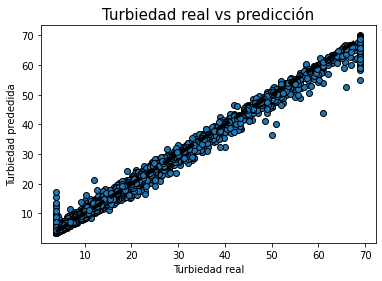

In [71]:
fig, ax = plt.subplots()
ax.scatter(y_train, pred_vrl_train, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Turbiedad real', fontsize=10)
ax.set_ylabel('Turbiedad prededida', fontsize=10)
ax.set_title('Turbiedad real vs predicción', fontsize=15)
plt.show()

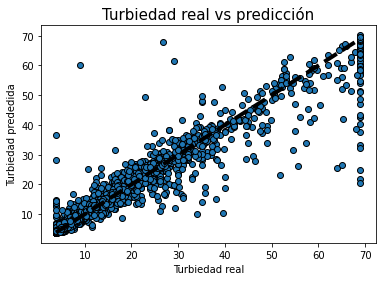

In [72]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_vrl_test, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Turbiedad real', fontsize=10)
ax.set_ylabel('Turbiedad prededida', fontsize=10)
ax.set_title('Turbiedad real vs predicción', fontsize=15)
plt.show()